In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#warnings
import warnings
warnings.filterwarnings('ignore')

#***Load Dataset:-***

In [108]:
#load dataset
df=pd.read_csv('/content/biased_leukemia_dataset.csv')

In [109]:
df.head()

,Patient_ID,Age,Gender,Country,WBC_Count,RBC_Count,Platelet_Count,Hemoglobin_Level,Bone_Marrow_Blasts,Genetic_Mutation,...,Alcohol_Consumption,Radiation_Exposure,Infection_History,BMI,Chronic_Illness,Immune_Disorders,Ethnicity,Socioeconomic_Status,Urban_Rural,Leukemia_Status
0,1,52,Male,China,2698,5.36,262493,12.2,72,Yes,...,No,No,No,24.0,No,No,Ethnic_Group_B,Low,Rural,Negative
1,2,15,Female,China,4857,4.81,277877,11.9,97,Yes,...,No,No,No,28.7,No,No,Ethnic_Group_A,Low,Urban,Positive
2,3,72,Male,France,9614,5.17,319600,13.4,94,No,...,Yes,No,No,27.7,No,No,Ethnic_Group_B,Low,Urban,Negative
3,4,61,Male,Brazil,6278,5.41,215200,11.6,50,No,...,No,No,No,31.6,No,No,Ethnic_Group_A,Medium,Rural,Negative
4,5,21,Male,Brazil,8342,4.78,309169,14.3,28,No,...,No,No,No,22.3,No,No,Ethnic_Group_B,Low,Rural,Negative


In [110]:
#shape of dataset
df.shape

(143194, 22)

#***EDA(Explotary Data Analysis):-***

In [111]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143194 entries, 0 to 143193
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Patient_ID            143194 non-null  int64  
 1   Age                   143194 non-null  int64  
 2   Gender                143194 non-null  object 
 3   Country               143194 non-null  object 
 4   WBC_Count             143194 non-null  int64  
 5   RBC_Count             143194 non-null  float64
 6   Platelet_Count        143194 non-null  int64  
 7   Hemoglobin_Level      143194 non-null  float64
 8   Bone_Marrow_Blasts    143194 non-null  int64  
 9   Genetic_Mutation      143194 non-null  object 
 10  Family_History        143194 non-null  object 
 11  Smoking_Status        143194 non-null  object 
 12  Alcohol_Consumption   143194 non-null  object 
 13  Radiation_Exposure    143194 non-null  object 
 14  Infection_History     143194 non-null  object 
 15  

In [112]:
#drop the unncessary columns
df.drop(['Patient_ID','Ethnicity'],axis=1,inplace=True)

In [113]:
#dataset describe
df.describe()

,Age,WBC_Count,RBC_Count,Platelet_Count,Hemoglobin_Level,Bone_Marrow_Blasts,BMI
count,143194.000000,143194.000000,143194.000000,143194.000000,143194.000000,143194.000000,143194.000000
mean,44.945200,7001.289879,4.998193,249933.012137,13.498334,49.547984,24.990679
std,25.737805,2007.444410,0.500298,49842.308243,1.996714,28.837607,4.999786
min,1.000000,-1602.000000,2.940000,46069.000000,4.700000,0.000000,2.800000
25%,23.000000,5644.250000,4.660000,216372.000000,12.100000,25.000000,21.600000
50%,45.000000,7007.000000,5.000000,250248.500000,13.500000,50.000000,25.000000
75%,67.000000,8352.000000,5.340000,283603.500000,14.800000,75.000000,28.300000
max,89.000000,15586.000000,7.150000,460325.000000,22.200000,99.000000,49.100000


In [114]:
#check the missing values
df.isnull().sum()

,0
Age,0
Gender,0
Country,0
WBC_Count,0
RBC_Count,0
Platelet_Count,0
Hemoglobin_Level,0
Bone_Marrow_Blasts,0
Genetic_Mutation,0
Family_History,0


In [115]:
#check the duplicates
df.duplicated().sum()

0

In [116]:
cate_col=df.select_dtypes(include='object').columns
cate_col

Index(['Gender', 'Country', 'Genetic_Mutation', 'Family_History',
       'Smoking_Status', 'Alcohol_Consumption', 'Radiation_Exposure',
       'Infection_History', 'Chronic_Illness', 'Immune_Disorders',
       'Socioeconomic_Status', 'Urban_Rural', 'Leukemia_Status'],
      dtype='object')

In [117]:
num_col=df.select_dtypes(exclude='object').columns
num_col

Index(['Age', 'WBC_Count', 'RBC_Count', 'Platelet_Count', 'Hemoglobin_Level',
       'Bone_Marrow_Blasts', 'BMI'],
      dtype='object')

#***Data visualization:-***

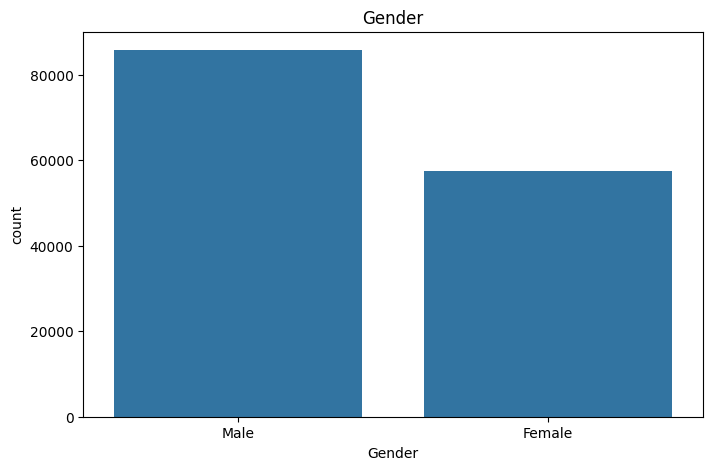

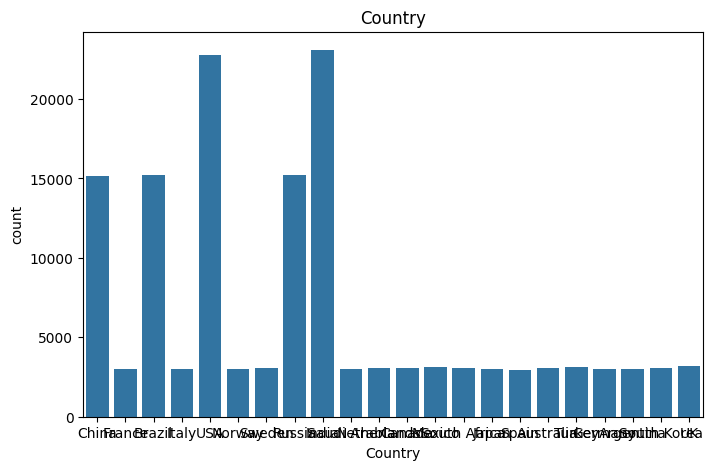

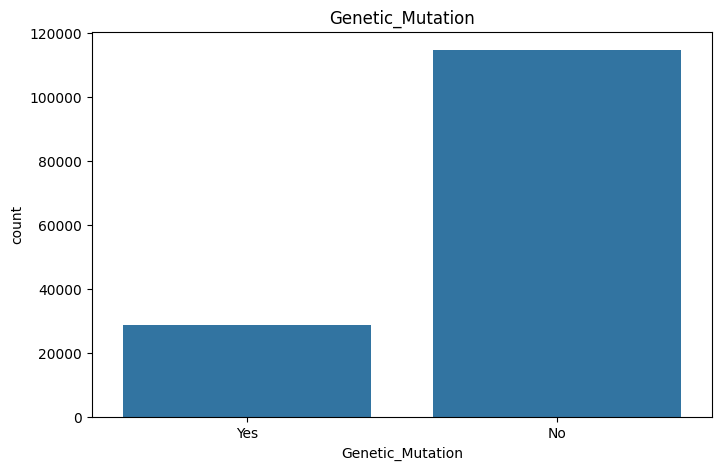

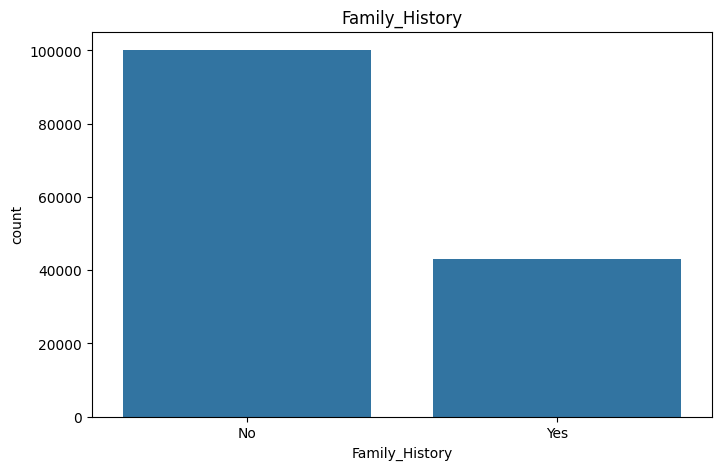

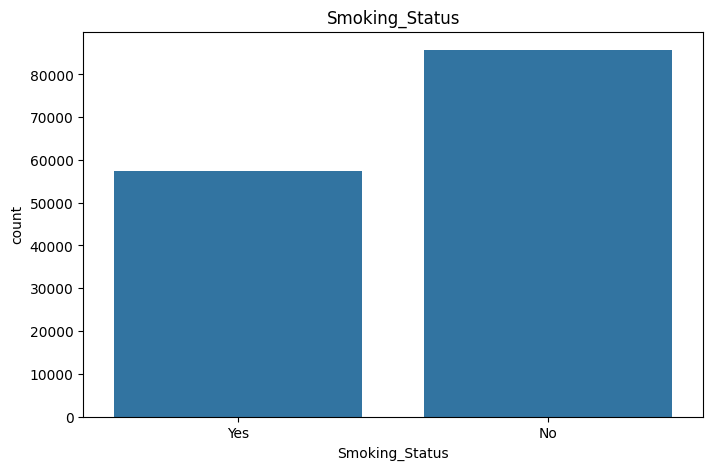

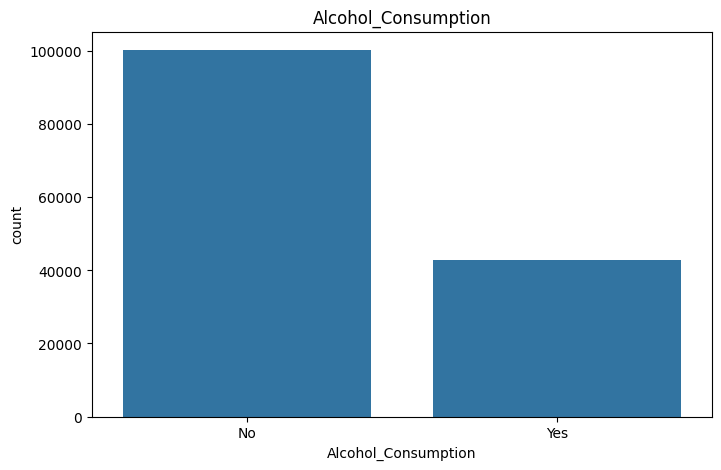

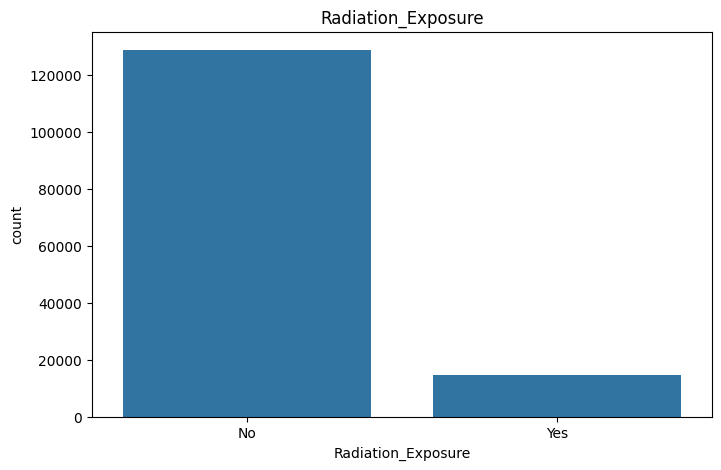

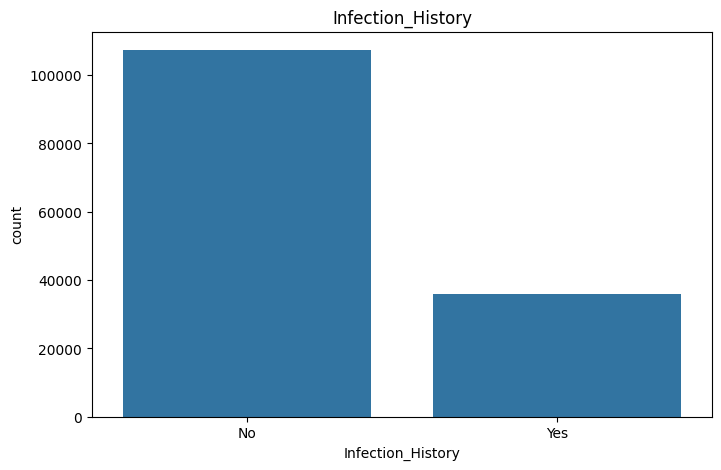

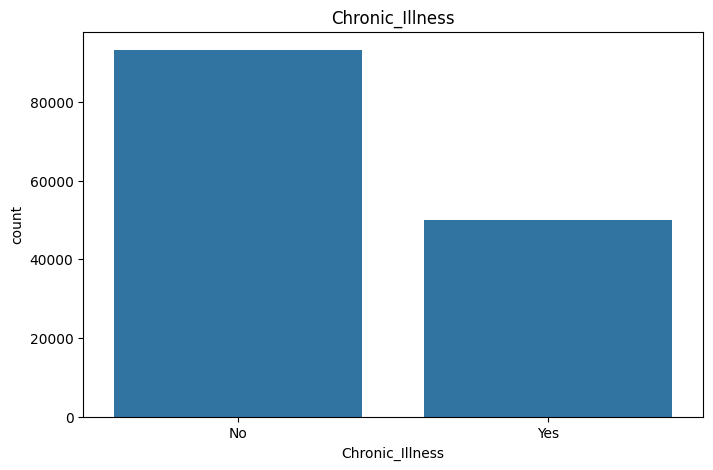

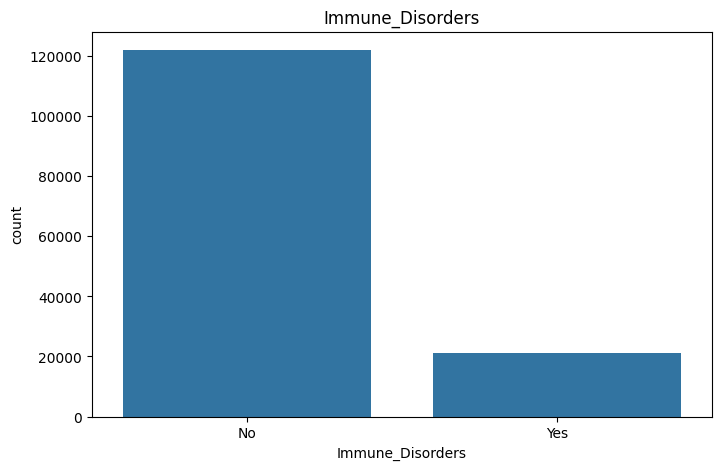

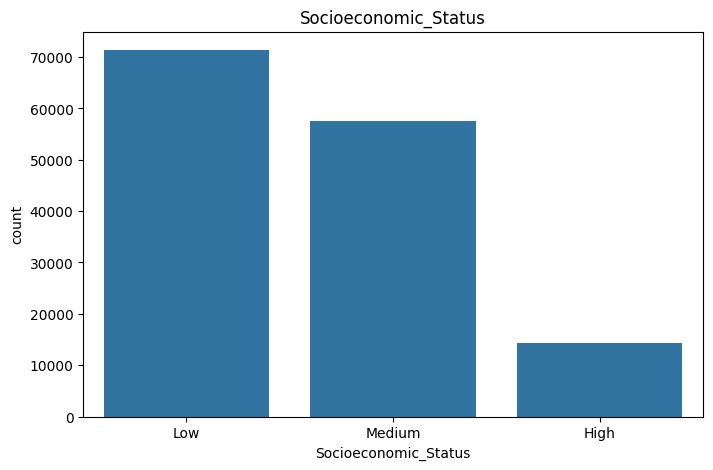

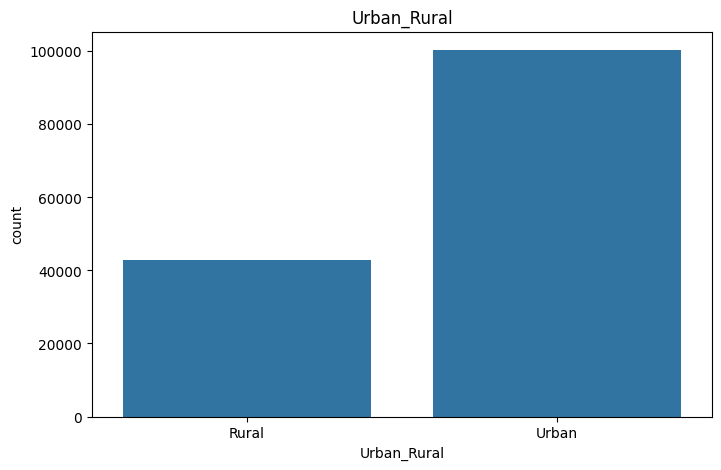

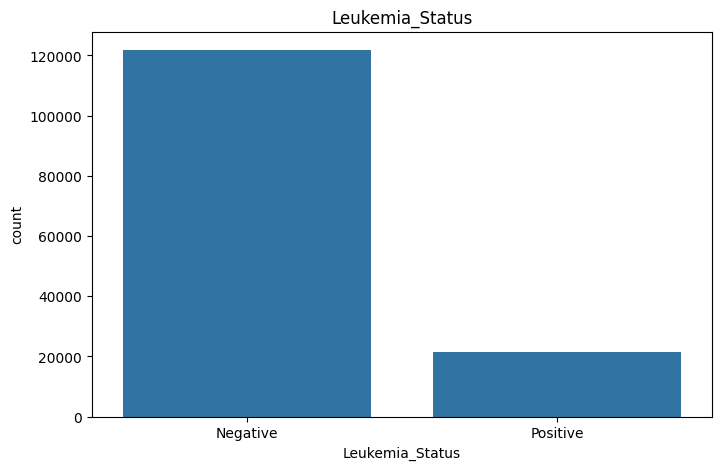

In [118]:
#data visualization on categorical column
for col in cate_col:
  plt.figure(figsize=(8,5))
  sns.countplot(x=col,data=df)
  plt.title(col)
  plt.show()

***Categorical column vs Leukemia status***

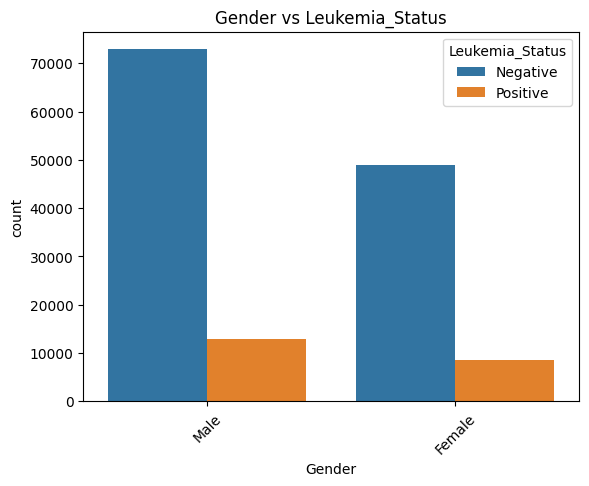

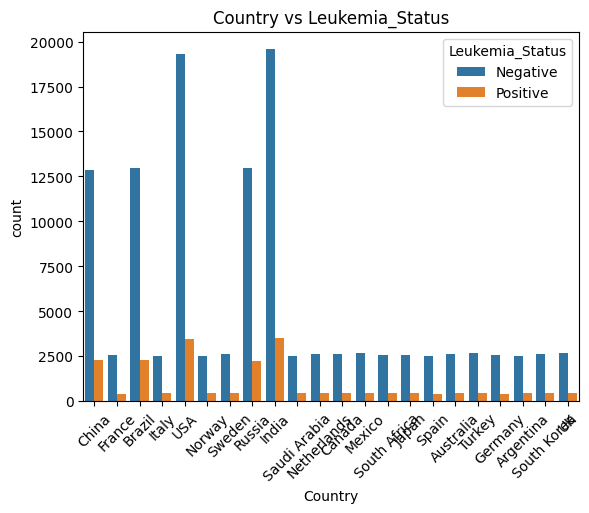

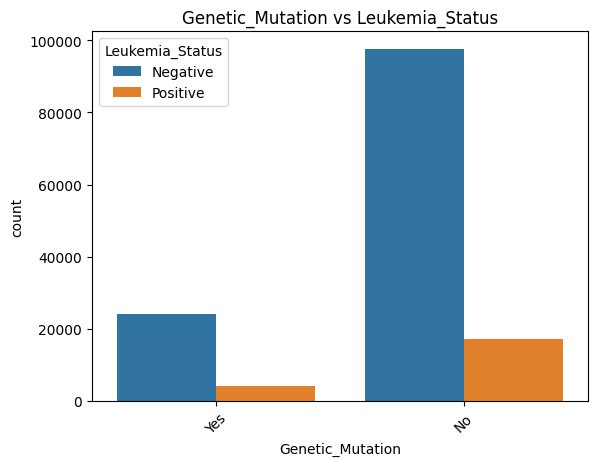

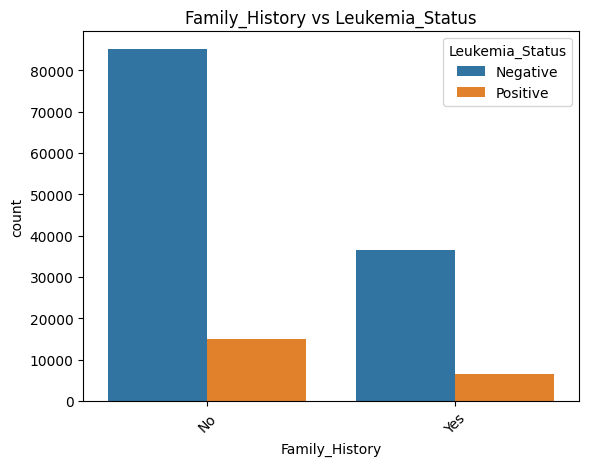

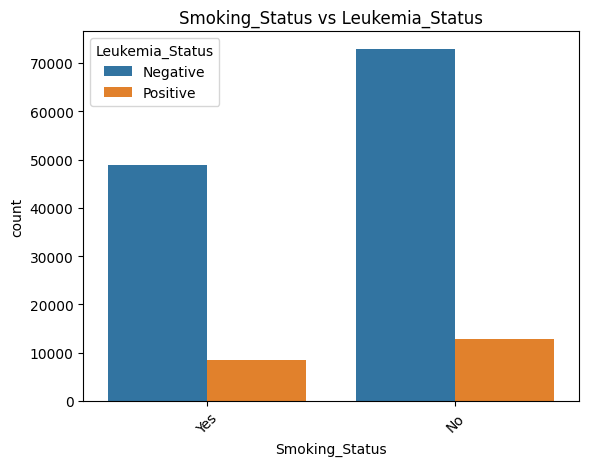

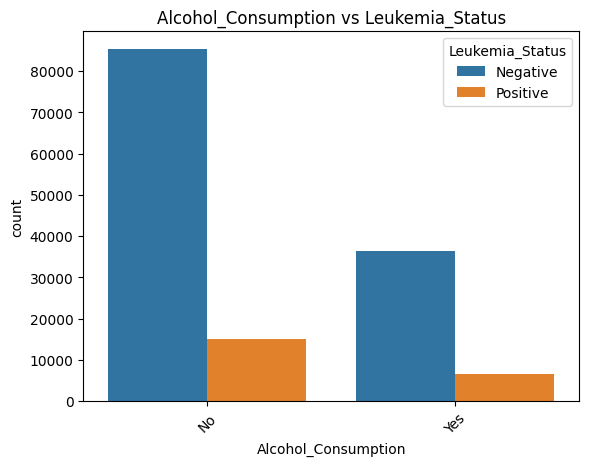

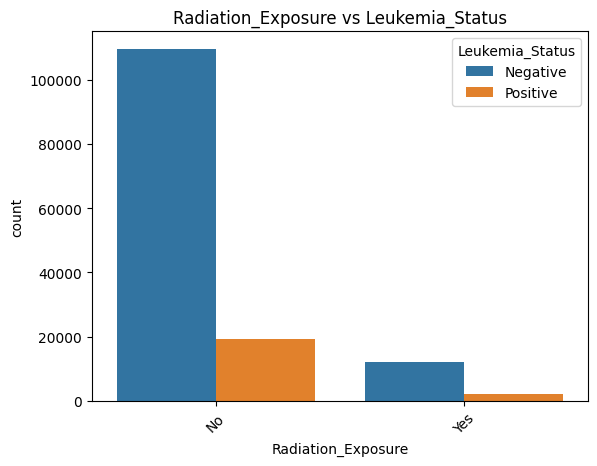

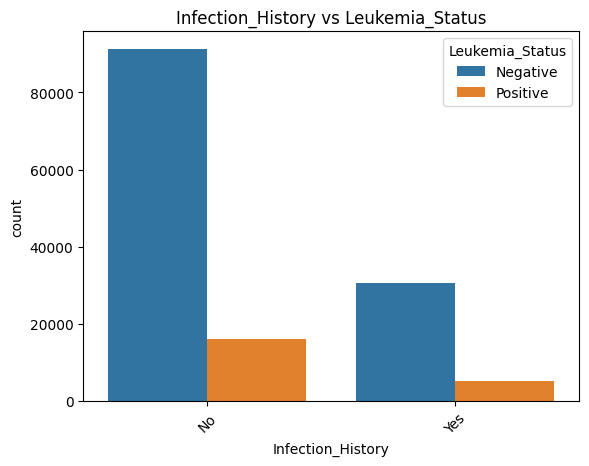

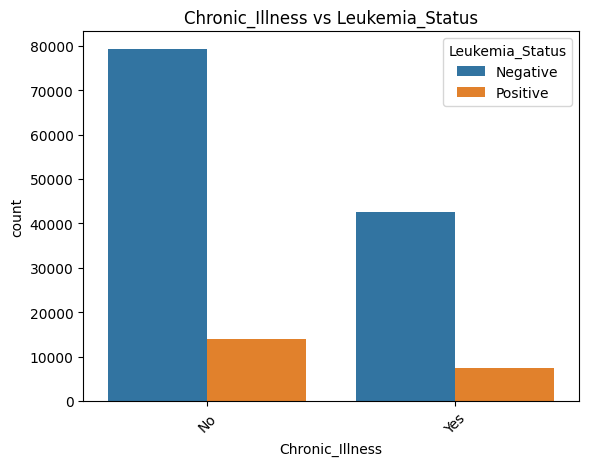

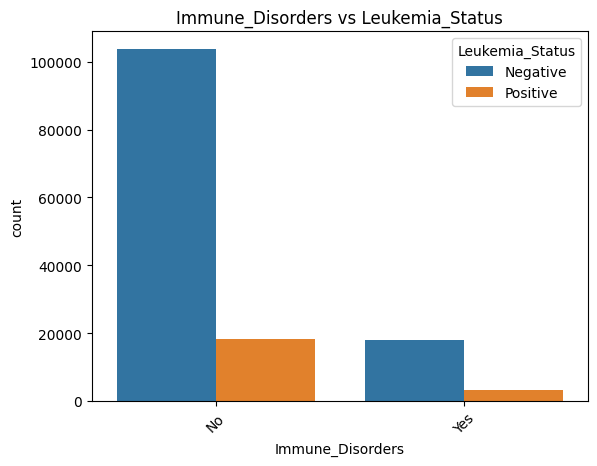

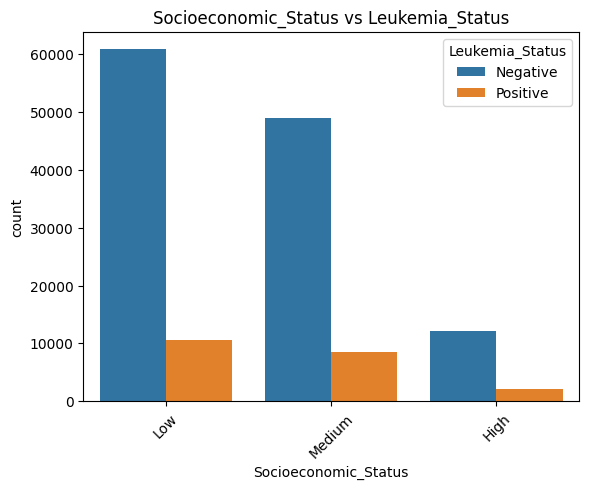

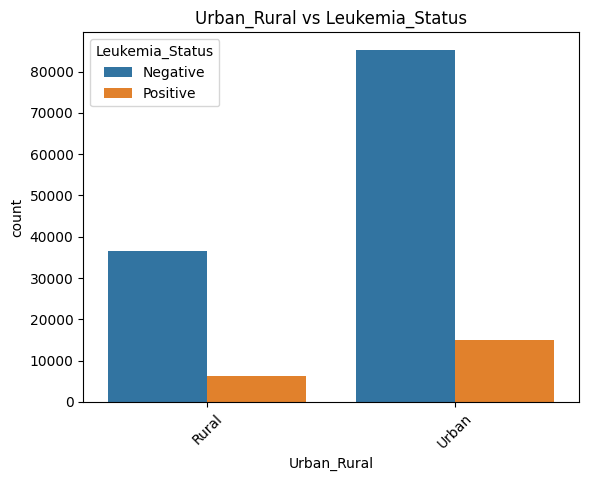

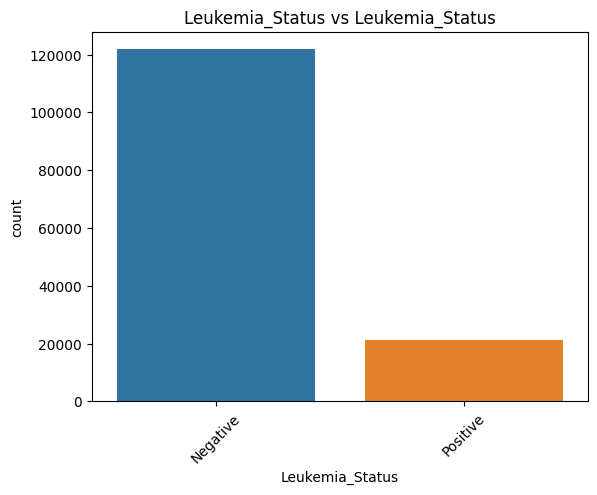

In [119]:
# Relationship between Leukemia_Status and Categorical Features
for feature in cate_col:
    sns.countplot(x=feature, hue='Leukemia_Status', data=df)
    plt.title(f'{feature} vs Leukemia_Status')
    plt.xticks(rotation=45)
    plt.show()

***Numerical columns distribution***

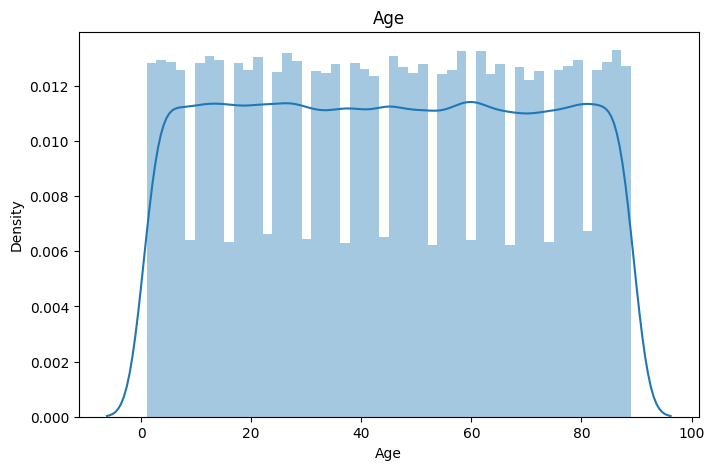

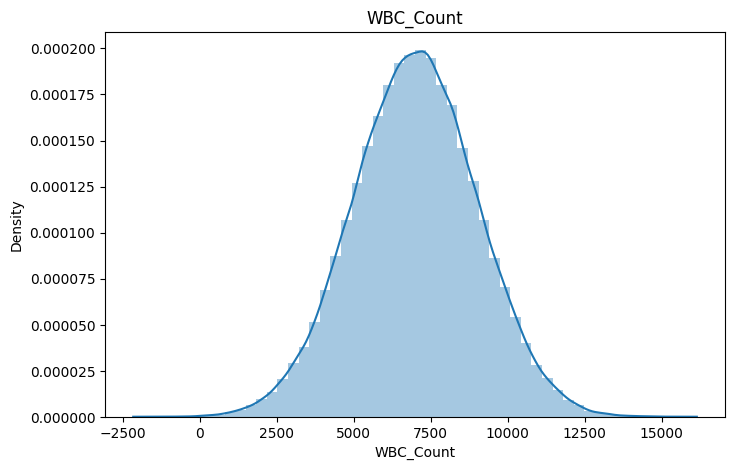

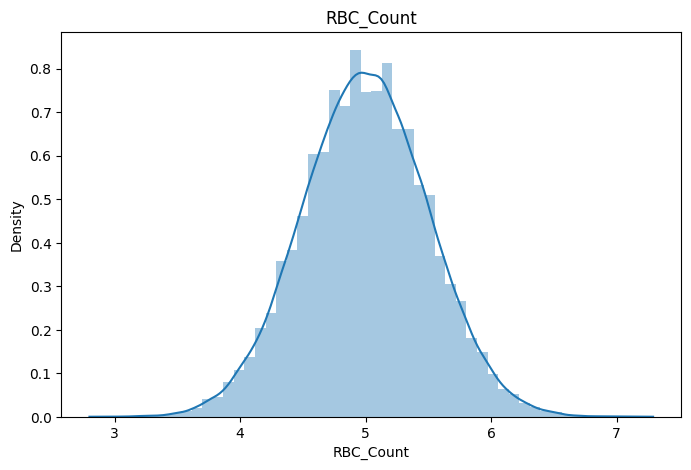

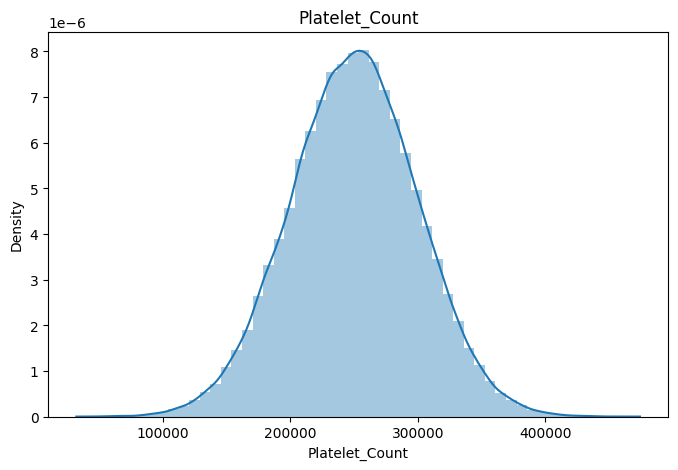

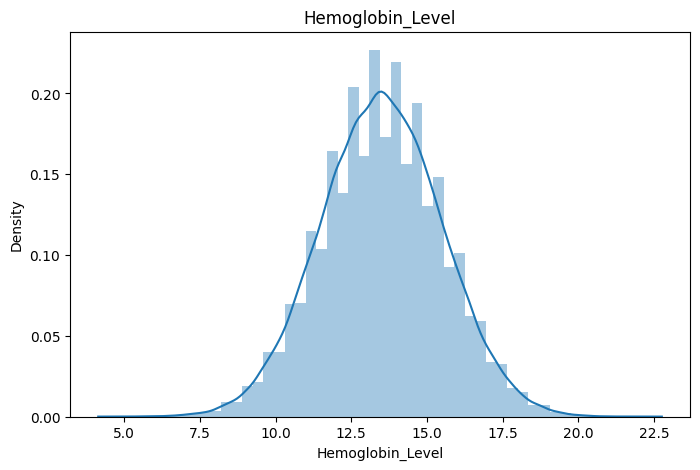

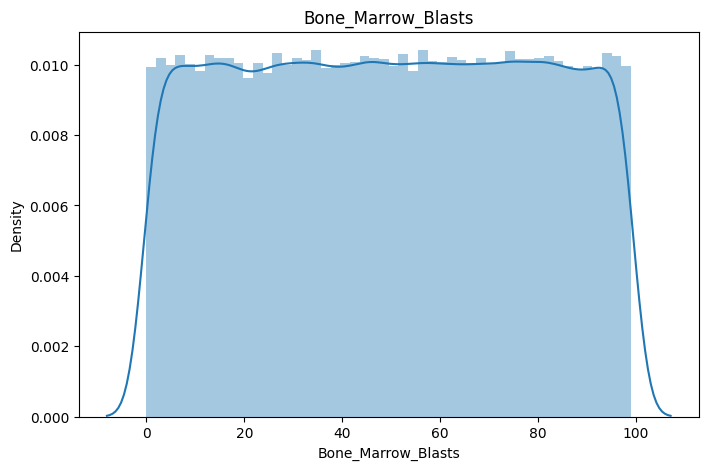

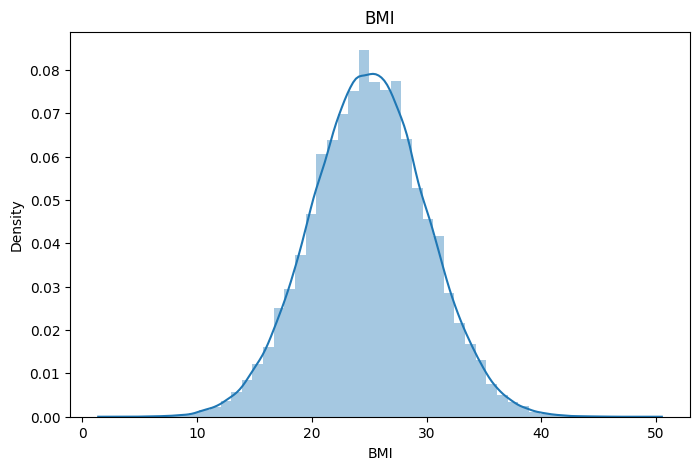

In [120]:
#num column distribution
for col in num_col:
  plt.figure(figsize=(8,5))
  sns.distplot(df[col])
  plt.title(col)
  plt.show()

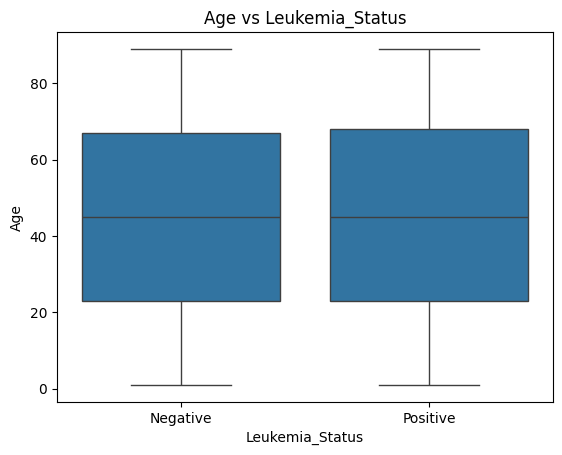

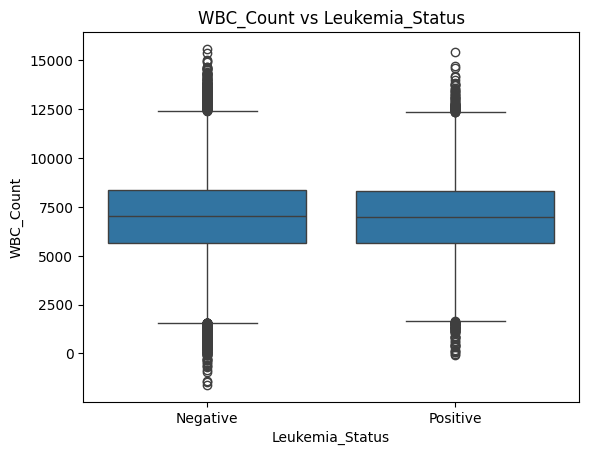

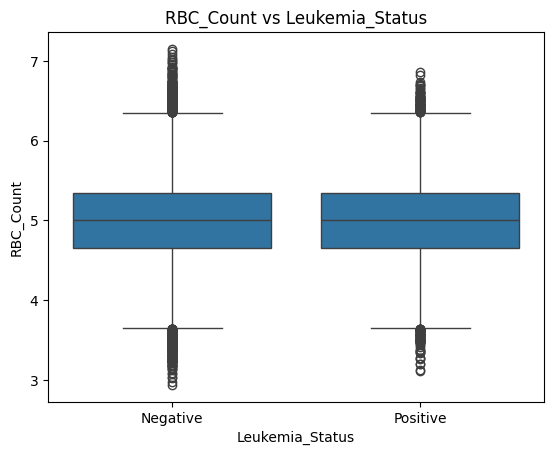

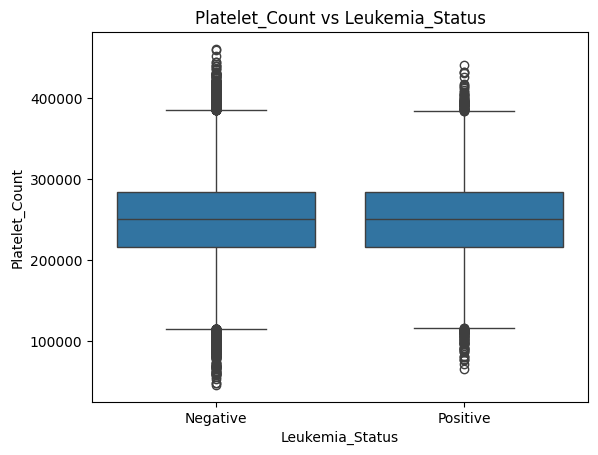

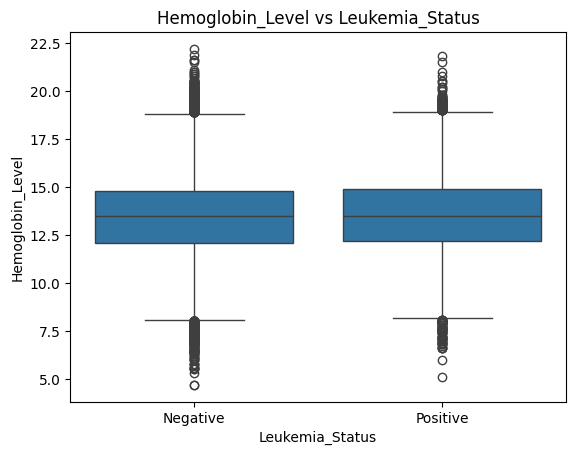

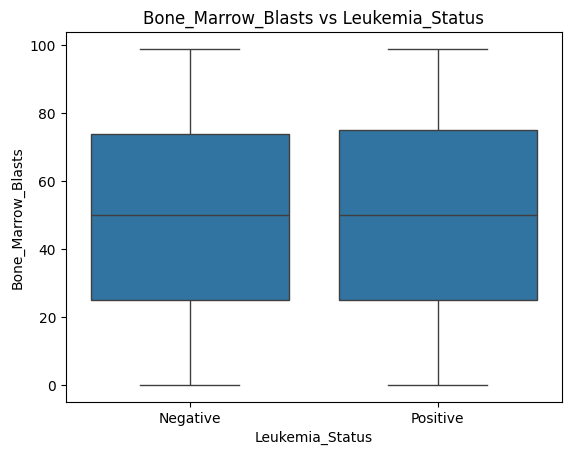

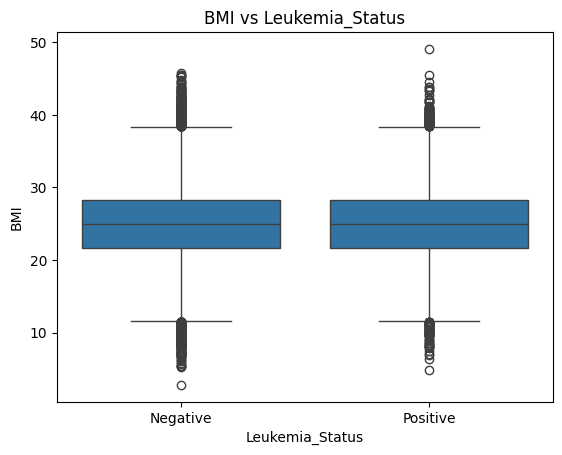

In [121]:
# Relationship between Leukemia_Status and Numerical Features
for feature in num_col:
    sns.boxplot(x='Leukemia_Status', y=feature, data=df)
    plt.title(f'{feature} vs Leukemia_Status')
    plt.show()

In [122]:
#copy dataset
df2=df.copy()

#***Label Encoding:-***

In [123]:
#check the unique values in column
for col in cate_col:
  print(col)
  print(df[col].unique())
  print('-'*50)

Gender
['Male' 'Female']
--------------------------------------------------
Country
['China' 'France' 'Brazil' 'Italy' 'USA' 'Norway' 'Sweden' 'Russia'
 'India' 'Saudi Arabia' 'Netherlands' 'Canada' 'Mexico' 'South Africa'
 'Japan' 'Spain' 'Australia' 'Turkey' 'Germany' 'Argentina' 'South Korea'
 'UK']
--------------------------------------------------
Genetic_Mutation
['Yes' 'No']
--------------------------------------------------
Family_History
['No' 'Yes']
--------------------------------------------------
Smoking_Status
['Yes' 'No']
--------------------------------------------------
Alcohol_Consumption
['No' 'Yes']
--------------------------------------------------
Radiation_Exposure
['No' 'Yes']
--------------------------------------------------
Infection_History
['No' 'Yes']
--------------------------------------------------
Chronic_Illness
['No' 'Yes']
--------------------------------------------------
Immune_Disorders
['No' 'Yes']
-----------------------------------------------

In [124]:
le=LabelEncoder()
for col in cate_col:
  df[col]=le.fit_transform(df[col])
  print(col)

Gender
Country
Genetic_Mutation
Family_History
Smoking_Status
Alcohol_Consumption
Radiation_Exposure
Infection_History
Chronic_Illness
Immune_Disorders
Socioeconomic_Status
Urban_Rural
Leukemia_Status


In [125]:
#drop the unncessay column
df.drop(columns=['Country','Socioeconomic_Status','Urban_Rural'],axis=1,inplace=True)

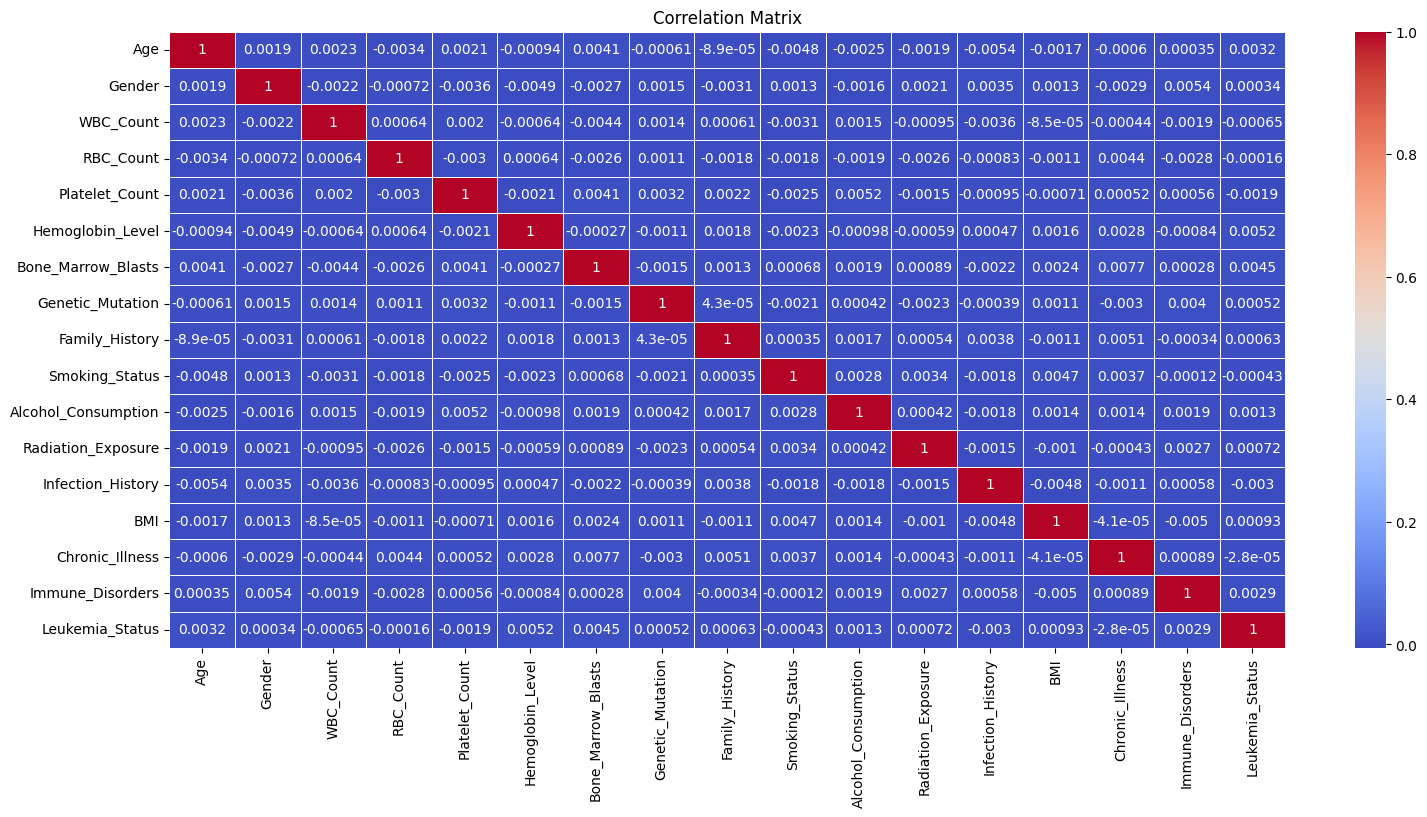

In [126]:
# Correlation Matrix
plt.figure(figsize=(18, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',linewidths=.7)
plt.title('Correlation Matrix')
plt.show()

In [127]:
# Compute correlation matrix
corr_matrix = df.corr()

In [128]:
corr_data=corr_matrix[['Leukemia_Status']].sort_values(by='Leukemia_Status', ascending=False)
corr_data

,Leukemia_Status
Leukemia_Status,1.000000
Hemoglobin_Level,0.005208
Bone_Marrow_Blasts,0.004512
Age,0.003192
Immune_Disorders,0.002878
Alcohol_Consumption,0.001302
BMI,0.000926
Radiation_Exposure,0.000721
Family_History,0.000632
Genetic_Mutation,0.000522


#***Split in X,y:-***

In [143]:
X=df.drop('Leukemia_Status',axis=1)
y=df['Leukemia_Status']

#***Features Selection:-***

In [130]:
# Train Random Forest
model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

In [131]:
# Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)

WBC_Count              0.142517
Platelet_Count         0.142499
BMI                    0.127325
RBC_Count              0.126406
Hemoglobin_Level       0.112542
Age                    0.110574
Bone_Marrow_Blasts     0.108694
Gender                 0.016946
Smoking_Status         0.016738
Chronic_Illness        0.015998
Family_History         0.015903
Alcohol_Consumption    0.014986
Infection_History      0.014242
Genetic_Mutation       0.013141
Immune_Disorders       0.011443
Radiation_Exposure     0.010046
dtype: float64


drop the uncessary column on feature selection


In [144]:
X.drop(['Immune_Disorders','Infection_History','Alcohol_Consumption',
        'Smoking_Status','Gender','Chronic_Illness','Radiation_Exposure','Genetic_Mutation','Family_History'],axis=1,inplace=True)

In [145]:
y.value_counts()

,count
Leukemia_Status,
0,121797
1,21397


it has highly inbalance Target column use SMOTE to balace it

In [146]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X,y=smote.fit_resample(X,y)

In [147]:
#check the target value count
y.value_counts()

,count
Leukemia_Status,
0,121797
1,121797


In [148]:
X.shape

(243594, 7)

#***Split in to Train and Test:-***

In [149]:
#split the dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [150]:
#check shape
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((194875, 7), (48719, 7), (194875,), (48719,))

#***Build model:-***

In [151]:
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [152]:
#predict y_pred
y_pred=model.predict(X_test)

In [153]:
#evaluate model
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy:-",accuracy)

Accuracy:- 0.7872082760319382


#***Save the Model:-***

In [154]:
import joblib
joblib.dump(model,"Model.pkl")
print("model saved sucessfully")

model saved sucessfully
